Build the linear regression model using scikit learn in boston data to predict 'Price'
based on other dependent variable.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import warnings  #to supress fututre warnings(not related to model making)
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
data_frame = pd.DataFrame(boston.data,columns=boston.feature_names)
data_frame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
target = pd.DataFrame(boston.target,columns=['prices'])
target.head()

,prices
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [28]:
data_frame.shape

(506, 13)

In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
data_frame.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
whole_data = pd.concat([data_frame,target],axis=1)

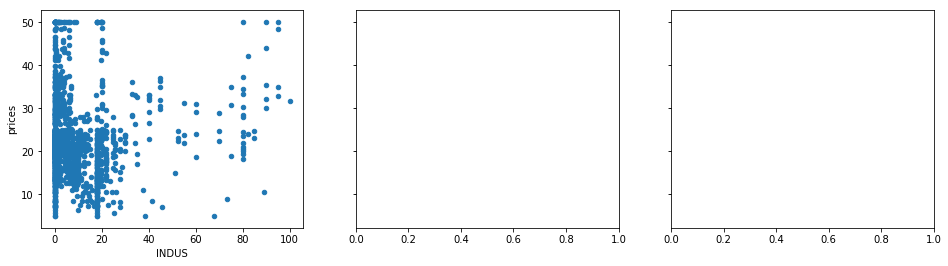

In [8]:
%matplotlib inline
#Seeing the relationship between predictors and target variable
fig, axs = plt.subplots(1, 3, sharey=True)
whole_data.plot(kind='scatter', x='CRIM', y='prices', ax=axs[0], figsize=(16, 4))
whole_data.plot(kind='scatter', x='ZN', y='prices', ax=axs[0], figsize=(16, 4))
whole_data.plot(kind='scatter', x='INDUS', y='prices', ax=axs[0], figsize=(16,4))

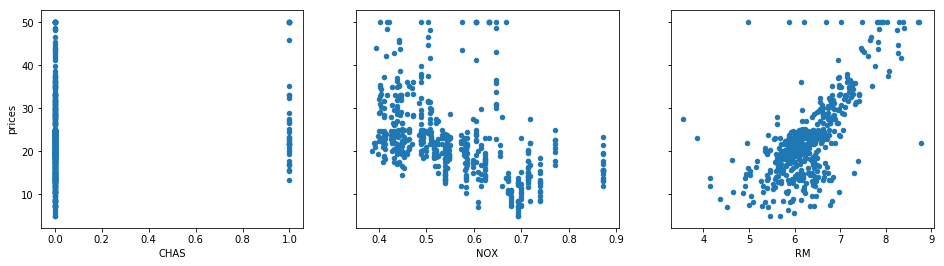

In [33]:
fig, axs = plt.subplots(1, 3, sharey=True)
whole_data.plot(kind='scatter', x='CHAS', y='prices', ax=axs[0], figsize=(16, 4))
whole_data.plot(kind='scatter', x='NOX', y='prices', ax=axs[1], figsize=(16, 4))
whole_data.plot(kind='scatter', x='RM', y='prices', ax=axs[2], figsize=(16, 4))

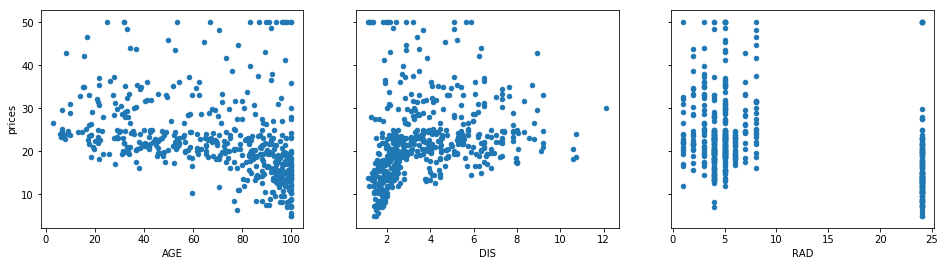

In [12]:
fig, axs = plt.subplots(1, 3, sharey=True)
whole_data.plot(kind='scatter', x='AGE', y='prices', ax=axs[0], figsize=(16, 4))
whole_data.plot(kind='scatter', x='DIS', y='prices', ax=axs[1], figsize=(16, 4))
whole_data.plot(kind='scatter', x='RAD', y='prices', ax=axs[2], figsize=(16, 4))

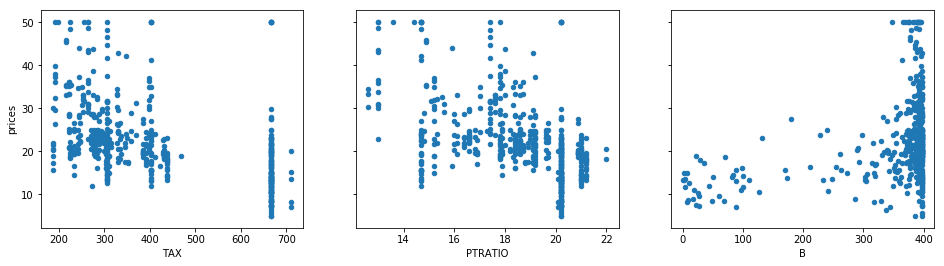

In [34]:
fig, axs = plt.subplots(1, 3, sharey=True)
whole_data.plot(kind='scatter', x='TAX', y='prices', ax=axs[0], figsize=(16, 4))
whole_data.plot(kind='scatter', x='PTRATIO', y='prices', ax=axs[1], figsize=(16, 4))
whole_data.plot(kind='scatter', x='B', y='prices', ax=axs[2], figsize=(16, 4))

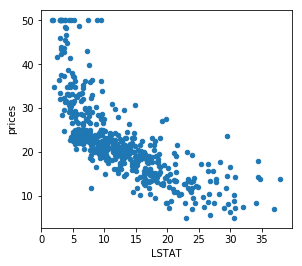

In [35]:
whole_data.plot(kind='scatter', x='LSTAT', y='prices',  figsize=(4.5, 4))

In [11]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_frame, target, test_size=0.2, random_state=4)

In [12]:
# follow the usual sklearn pattern: import, instantiate, fit
#multi variate linear regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
predictions = lm.predict(x_test)
print(predictions[0:5,])

[[12.06508881]
 [26.98544801]
 [17.59242607]
 [18.15842166]
 [36.91656975]]


In [14]:
lm.score(x_train,y_train)

0.7414502395070284

In [15]:
# print intercept 
print(lm.intercept_)

[35.60325757]


In [16]:
# print coefficients
names = [i for i in list(data_frame)]
lst = lm.coef_[0].tolist()
pd.DataFrame({'Coefficient':lst, 'Features':names})

,Coefficient,Features
0,-0.114744,CRIM
1,0.047088,ZN
2,0.008703,INDUS
3,3.238188,CHAS
4,-16.724057,NOX
5,3.876630,RM
6,-0.010822,AGE
7,-1.541446,DIS
8,0.292604,RAD
9,-0.013399,TAX


Text(0,0.5,'Predictions')

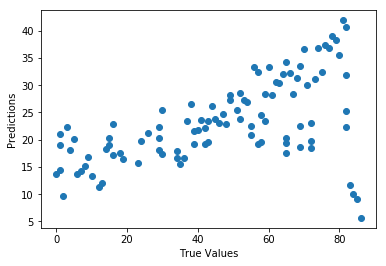

In [22]:
## The line / model
plt.scatter(y_test, predictions)
plt.xscale('linear')
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [19]:
mse = sklearn.metrics.mean_squared_error(y_test, predictions)
mse

25.407976717075254

In [17]:
import statsmodels.formula.api as smf
data = pd.concat([x_train,y_train],axis=1)
lm = smf.ols(formula='prices ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT', data=data).fit()
print(lm.conf_int())

                   0          1
Intercept  24.789226  46.417290
CRIM       -0.187244  -0.042243
ZN          0.016417   0.077758
INDUS      -0.128546   0.145952
CHAS        1.250708   5.225668
NOX       -24.877642  -8.570472
RM          2.981126   4.772134
AGE        -0.039809   0.018165
DIS        -1.982323  -1.100569
RAD         0.148091   0.437117
TAX        -0.021707  -0.005091
PTRATIO    -1.190537  -0.624077
B           0.003045   0.014781
LSTAT      -0.569825  -0.347669


In [24]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 prices   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     86.03
Date:                Sat, 14 Jul 2018   Prob (F-statistic):          8.15e-106
Time:                        19:54:13   Log-Likelihood:                -1190.2
No. Observations:                 404   AIC:                             2408.
Df Residuals:                     390   BIC:                             2464.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.6033      5.500      6.473      0.0